# **Lab 7.2 CNN**

In [77]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader,Subset
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch.optim as optim

Complete the `load_data()` function that loads the image using `ImageFolder()` with the specific `transforms.compose()` provided below.
`load_data()` will return `DataLoader()` and print the information about the Dataset.
This function must load only a pair of classes from the entire dataset.
Please ensure that the final image is in grayscale and has a size of 28x28.

`transforms.Compose()` :
- `transforms.Resize()`
- `transforms.ToTensor()`
- `transforms.Pad()`
- `transforms.RandomRotation(),`
- `transforms.CenterCrop()`

Resource : [`transforms.Compose()`](https://pytorch.org/vision/main/generated/torchvision.transforms.Compose.html#compose), [`torchvision.transforms v1`](<https://pytorch.org/vision/stable/transforms.html#v1-api-reference:~:text=custom)%20tv_tensor%20type.-,V1%20API%20Reference,-Geometry>)

# คุยกับอาจารย์ บอกว่าให้นำเข้าทั้ง 10 class ได้เลย โจทย์จริงๆคือต้องการทำโมเดลทำนายตัวเลข 0 - 9, แต่คำสั่งด้านบนเป็นโจทย์เก่าของ Binary classification 

In [78]:
def load_data(path,class_names=None):
    ### START CODE HERE ###
    transform = transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize((32, 32)), 
        transforms.Pad(padding=32,padding_mode='reflect'),
        transforms.RandomRotation(15),
        transforms.CenterCrop(32), #เอาออก 32x32 อิงตาม Architecture ของ Lenet
        transforms.ToTensor()
    ])

    # Load dataset with ImageFolder
    full_dataset = ImageFolder(root=path, transform=transform)

    #แบ่งข้อมูลเข้า DataLoader(Train:80%, Test:20%)
    train_size = int(0.8 * len(full_dataset))
    test_size = len(full_dataset) - train_size
    train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])
    
    #เข้า Dataloader ทีละ 16 ภาพ
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

    #แสดงผลตามโจทย์
    train_class_0 = sum(1 for _, label in train_loader.dataset if label == 0)
    train_class_1 = sum(1 for _, label in train_loader.dataset if label == 1)
    train_class_2 = sum(1 for _, label in train_loader.dataset if label == 2)
    train_class_3 = sum(1 for _, label in train_loader.dataset if label == 3)
    train_class_4 = sum(1 for _, label in train_loader.dataset if label == 4)
    train_class_5 = sum(1 for _, label in train_loader.dataset if label == 5)
    train_class_6 = sum(1 for _, label in train_loader.dataset if label == 6)
    train_class_7 = sum(1 for _, label in train_loader.dataset if label == 7)
    train_class_8 = sum(1 for _, label in train_loader.dataset if label == 8)
    train_class_9 = sum(1 for _, label in train_loader.dataset if label == 9)
    
    test_class_0 = sum(1 for _, label in test_loader.dataset if label == 0)
    test_class_1 = sum(1 for _, label in test_loader.dataset if label == 1)
    test_class_2 = sum(1 for _, label in test_loader.dataset if label == 2)
    test_class_3 = sum(1 for _, label in test_loader.dataset if label == 3)
    test_class_4 = sum(1 for _, label in test_loader.dataset if label == 4)
    test_class_5 = sum(1 for _, label in test_loader.dataset if label == 5)
    test_class_6 = sum(1 for _, label in test_loader.dataset if label == 6)
    test_class_7 = sum(1 for _, label in test_loader.dataset if label == 7)
    test_class_8 = sum(1 for _, label in test_loader.dataset if label == 8)
    test_class_9 = sum(1 for _, label in test_loader.dataset if label == 9)
    
    print("📃Train Dataset:")
    print("     Number of images in class 0:", train_class_0)
    print("     Number of images in class 1:", train_class_1)
    print("     Number of images in class 1:", train_class_2)
    print("     Number of images in class 1:", train_class_3)
    print("     Number of images in class 1:", train_class_4)
    print("     Number of images in class 1:", train_class_5)
    print("     Number of images in class 1:", train_class_6)
    print("     Number of images in class 1:", train_class_7)
    print("     Number of images in class 1:", train_class_8)
    print("     Number of images in class 1:", train_class_9)
    print("     Number of training samples:", len(train_loader.dataset))
    print("📃Test Dataset:")
    print("     Number of images in class 0:", test_class_0)
    print("     Number of images in class 1:", test_class_1)
    print("     Number of images in class 1:", test_class_2)
    print("     Number of images in class 1:", test_class_3)
    print("     Number of images in class 1:", test_class_4)
    print("     Number of images in class 1:", test_class_5)
    print("     Number of images in class 1:", test_class_6)
    print("     Number of images in class 1:", test_class_7)
    print("     Number of images in class 1:", test_class_8)
    print("     Number of images in class 1:", test_class_9)
    print("     Number of training samples:", len(test_loader.dataset))
    # ### END CODE HERE ###
    return train_loader, test_loader

Use your `load_data()` function to load the dataset in the cell below. Then, display the image from the first batch.

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

```
📃Train Dataset:
	Number of images in class 0: 313
	Number of images in class 1: 308
	Number of training samples: 621

📃Test Dataset:
	Number of images in class 0: 75
	Number of images in class 1: 81
	Number of testing samples: 156
```


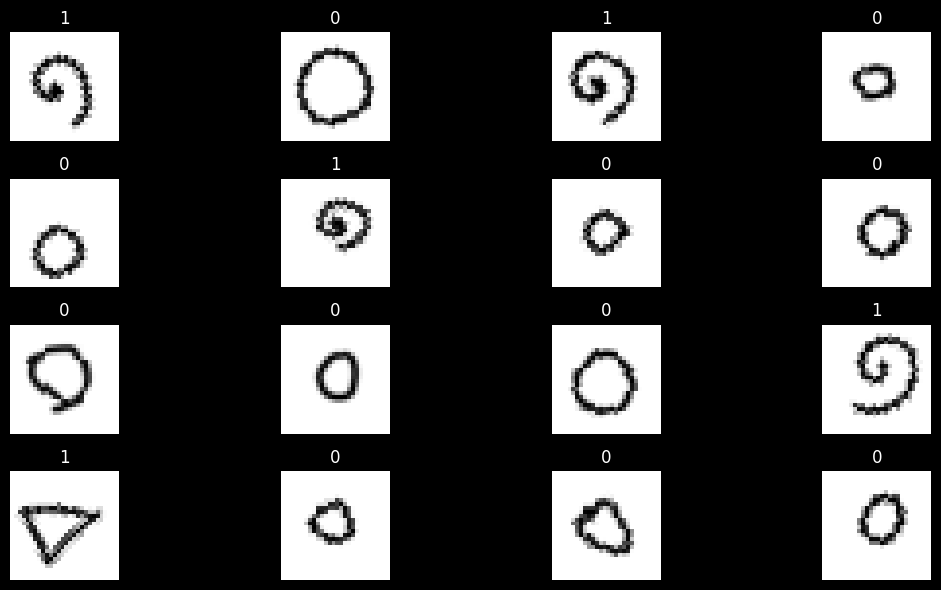

</details>

📃Train Dataset:
     Number of images in class 0: 272
     Number of images in class 1: 281
     Number of images in class 1: 285
     Number of images in class 1: 274
     Number of images in class 1: 269
     Number of images in class 1: 272
     Number of images in class 1: 268
     Number of images in class 1: 273
     Number of images in class 1: 253
     Number of images in class 1: 281
     Number of training samples: 2728
📃Test Dataset:
     Number of images in class 0: 69
     Number of images in class 1: 49
     Number of images in class 1: 65
     Number of images in class 1: 76
     Number of images in class 1: 65
     Number of images in class 1: 68
     Number of images in class 1: 79
     Number of images in class 1: 68
     Number of images in class 1: 90
     Number of images in class 1: 54
     Number of training samples: 683


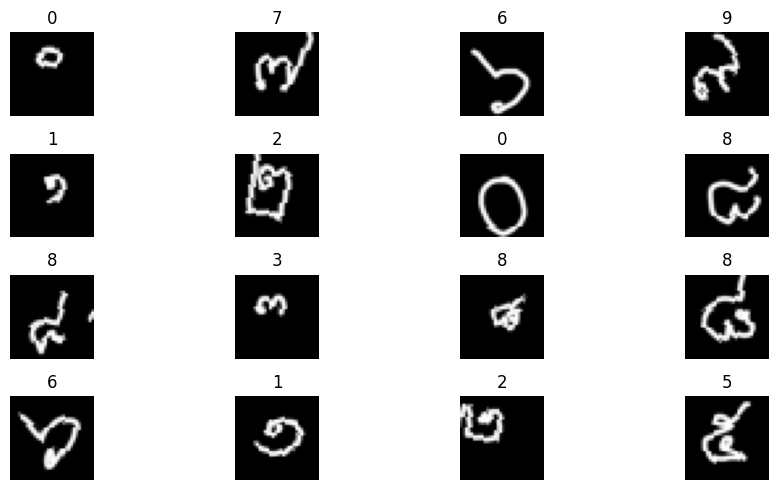

In [79]:
### START CODE HERE ###
def imshow_grid(images,labels):
    fig = plt.figure(figsize=(10, 5))
    num_images = len(images)
    grid_size = int(np.ceil(np.sqrt(num_images)))
    
    for i in range(num_images):
        a = fig.add_subplot(grid_size, grid_size, i + 1)
        img = images[i]
        img = np.transpose(img, (1, 2, 0))
        img = np.clip(img, 0, 1)
        # print(img.shape)
        plt.imshow(img, cmap="Grays")
        a.axis("off")
        
        plt.title(str(labels[i].item()))
        # print(img.shape)
    plt.tight_layout()
    plt.show()
    
path = 'thai-handwriting-number.appspot.com'
train_loader, test_loader = load_data(path)
images, labels = next(iter(train_loader))
imshow_grid(images,labels)

### END CODE HERE ###

### **Create Models**
**CustomLeNet**:
- **Input**:  RGB images
- **Architecture**: Multiple convolutional layers with ReLU activations, followed by fully connected layers with ReLU activations
- **Description**: This is a convolutional neural network with two convolutional layers followed by two fully connected layers. It applies convolutional operations with ReLU activations, followed by flattening the output and passing through fully connected layers with ReLU activations. Finally, it produces a single neuron output with sigmoid activation.


In [80]:
### START CODE HERE ###
class CustomLeNet(nn.Module):
    def __init__(self):
        super(CustomLeNet, self).__init__()
        #จริงๆ ภาพเป็น RGB จะใช้ in_channel=3 แต่เนื่องจากโจทย์ข้างบนบอกให้ภาพนำเข้าแบบ Grayscale เลยระบุ in_channels=1 แทน
        #ประกาศทุกอย่างตาม Lenet Architecture
        #อ้างอิง https://www.youtube.com/watch?v=P-BnWH4aJpc&t=690s แต่เปลี่ยน activation เป็น ReLU ตามโจทย์กำหนด
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5,stride=1,padding=0)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5,stride=1,padding=0)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5,stride=1,padding=0)
        
        self.fc1 = nn.Linear(in_features=120, out_features=84)
        self.fc2 = nn.Linear(in_features=84, out_features=10)
        
        self.avg_pool = nn.AvgPool2d(kernel_size=2,stride=2)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.avg_pool(x)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.avg_pool(x)
        
        x = self.conv3(x)
        x = self.relu(x)
        
        # Flatten the output from conv layers
        x = x.view(x.shape[0], -1)
        
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        
        #ปิดท้ายด้วย sigmoid ตามโจทย์กำหนด
        x = self.sigmoid(x)
        
        return x
        
        

### END CODE HERE ###



Complete the `train()` function in the cell below. This function should evaluate the model at every epoch, log the training loss/accuracy, test loss/accuracy. Additionally, it should save the model at the last epoch.

Resource : [PyTorch Training loop](<https://pytorch.org/tutorials/beginner/introyt/trainingyt.html#:~:text=%3D0.9)-,The%20Training%20Loop,-Below%2C%20we%20have>)


In [81]:
def train(model,opt,loss_fn,train_loader,test_loader,epochs=10,checkpoint_path=None,device='cpu'):
    ### START CODE HERE ###
    model = model.to(device)
    
    #เก็บ losses กับ accuracies
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
    
    #Training Loop
    for epoch in range(epochs):
        #Train Phase
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} [Training]"):
            images, labels = images.to(device), labels.to(device)
            
            opt.zero_grad()
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            #นำ loss ที่ได้ไปอัพเดท parameter ในการเทรน epoch ถัดไป
            loss.backward()
            opt.step()
            
            # loss และ accuracy สะสม ทบกันไป
            running_train_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
        
        train_loss = running_train_loss / len(train_loader.dataset)
        train_accuracy = correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        
        # Validation phase (testing)
        model.eval()
        running_test_loss = 0.0
        correct_test = 0
        total_test = 0
        
        with torch.no_grad():
            for images, labels in tqdm(test_loader, desc=f"Epoch {epoch+1}/{epochs} [Testing]"):
                images, labels = images.to(device), labels.to(device)
                
                outputs = model(images)
                loss = loss_fn(outputs, labels)
                
                running_test_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs.data, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()
        
        test_loss = running_test_loss / len(test_loader.dataset)
        test_accuracy = correct_test / total_test
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)
        
        print(f"Epoch {epoch+1}/{epochs}:")
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
    
    # Save the model ที่ epoch สุดท้าย
    if checkpoint_path:
            torch.save(model.state_dict(), f'{checkpoint_path}_epoch_{epoch+1}.pth')
            print(f'Model saved to {checkpoint_path}_epoch_{epoch+1}.pth')
    
    return train_losses, test_losses, train_accuracies, test_accuracies




    ### END CODE HERE ###

Use your `train()` function to train models.

In [82]:
### START CODE HERE ###
model = CustomLeNet()
opt = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
train(model, opt, loss_fn, train_loader, test_loader, epochs=200, checkpoint_path='trained/lenet', device='cuda' if torch.cuda.is_available() else 'cpu')

### END CODE HERE ###

Epoch 1/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 46.57it/s]


Epoch 1/200:
Train Loss: 2.2549, Train Accuracy: 0.2053
Test Loss: 2.1966, Test Accuracy: 0.3163


Epoch 2/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 50.06it/s]


Epoch 2/200:
Train Loss: 2.1799, Train Accuracy: 0.3526
Test Loss: 2.1721, Test Accuracy: 0.3909


Epoch 3/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 50.35it/s]


Epoch 3/200:
Train Loss: 2.1608, Train Accuracy: 0.3897
Test Loss: 2.1632, Test Accuracy: 0.4173


Epoch 4/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 49.00it/s]


Epoch 4/200:
Train Loss: 2.1515, Train Accuracy: 0.4230
Test Loss: 2.1619, Test Accuracy: 0.4026


Epoch 5/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 51.25it/s]


Epoch 5/200:
Train Loss: 2.1420, Train Accuracy: 0.4443
Test Loss: 2.1450, Test Accuracy: 0.4612


Epoch 6/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 49.93it/s]


Epoch 6/200:
Train Loss: 2.1393, Train Accuracy: 0.4604
Test Loss: 2.1435, Test Accuracy: 0.4817


Epoch 7/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 50.77it/s]


Epoch 7/200:
Train Loss: 2.1340, Train Accuracy: 0.4828
Test Loss: 2.1398, Test Accuracy: 0.5022


Epoch 8/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 49.08it/s]


Epoch 8/200:
Train Loss: 2.1307, Train Accuracy: 0.4916
Test Loss: 2.1341, Test Accuracy: 0.5198


Epoch 9/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 50.65it/s]


Epoch 9/200:
Train Loss: 2.1298, Train Accuracy: 0.4886
Test Loss: 2.1349, Test Accuracy: 0.4934


Epoch 10/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 50.59it/s]


Epoch 10/200:
Train Loss: 2.1260, Train Accuracy: 0.5011
Test Loss: 2.1320, Test Accuracy: 0.5110


Epoch 11/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 50.58it/s]


Epoch 11/200:
Train Loss: 2.1204, Train Accuracy: 0.5139
Test Loss: 2.1290, Test Accuracy: 0.4993


Epoch 12/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 50.12it/s]


Epoch 12/200:
Train Loss: 2.1167, Train Accuracy: 0.5249
Test Loss: 2.1257, Test Accuracy: 0.5095


Epoch 13/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 49.01it/s]


Epoch 13/200:
Train Loss: 2.1174, Train Accuracy: 0.5176
Test Loss: 2.1254, Test Accuracy: 0.5154


Epoch 14/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 50.41it/s]


Epoch 14/200:
Train Loss: 2.1107, Train Accuracy: 0.5400
Test Loss: 2.1183, Test Accuracy: 0.5212


Epoch 15/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 43.95it/s]


Epoch 15/200:
Train Loss: 2.1090, Train Accuracy: 0.5451
Test Loss: 2.1173, Test Accuracy: 0.5359


Epoch 16/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 45.07it/s]


Epoch 16/200:
Train Loss: 2.1077, Train Accuracy: 0.5418
Test Loss: 2.1165, Test Accuracy: 0.5315


Epoch 17/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 43.86it/s]


Epoch 17/200:
Train Loss: 2.1092, Train Accuracy: 0.5363
Test Loss: 2.1178, Test Accuracy: 0.5388


Epoch 18/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 44.17it/s]


Epoch 18/200:
Train Loss: 2.1052, Train Accuracy: 0.5491
Test Loss: 2.1148, Test Accuracy: 0.5417


Epoch 19/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.57it/s]


Epoch 19/200:
Train Loss: 2.1040, Train Accuracy: 0.5605
Test Loss: 2.1138, Test Accuracy: 0.5447


Epoch 20/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.28it/s]


Epoch 20/200:
Train Loss: 2.1037, Train Accuracy: 0.5521
Test Loss: 2.1124, Test Accuracy: 0.5432


Epoch 21/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.15it/s]


Epoch 21/200:
Train Loss: 2.1043, Train Accuracy: 0.5495
Test Loss: 2.1153, Test Accuracy: 0.5271


Epoch 22/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.64it/s]


Epoch 22/200:
Train Loss: 2.1010, Train Accuracy: 0.5620
Test Loss: 2.1111, Test Accuracy: 0.5403


Epoch 23/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.67it/s]


Epoch 23/200:
Train Loss: 2.0999, Train Accuracy: 0.5634
Test Loss: 2.1109, Test Accuracy: 0.5520


Epoch 24/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.68it/s]


Epoch 24/200:
Train Loss: 2.1010, Train Accuracy: 0.5630
Test Loss: 2.1201, Test Accuracy: 0.5344


Epoch 25/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.53it/s]


Epoch 25/200:
Train Loss: 2.1006, Train Accuracy: 0.5609
Test Loss: 2.1137, Test Accuracy: 0.5388


Epoch 26/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 46.32it/s]


Epoch 26/200:
Train Loss: 2.0994, Train Accuracy: 0.5656
Test Loss: 2.1149, Test Accuracy: 0.5447


Epoch 27/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 45.79it/s]


Epoch 27/200:
Train Loss: 2.1003, Train Accuracy: 0.5598
Test Loss: 2.1080, Test Accuracy: 0.5534


Epoch 28/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.48it/s]


Epoch 28/200:
Train Loss: 2.0979, Train Accuracy: 0.5696
Test Loss: 2.1105, Test Accuracy: 0.5476


Epoch 29/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 46.85it/s]


Epoch 29/200:
Train Loss: 2.0961, Train Accuracy: 0.5689
Test Loss: 2.1117, Test Accuracy: 0.5373


Epoch 30/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.98it/s]


Epoch 30/200:
Train Loss: 2.0953, Train Accuracy: 0.5770
Test Loss: 2.1108, Test Accuracy: 0.5520


Epoch 31/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 45.87it/s]


Epoch 31/200:
Train Loss: 2.0948, Train Accuracy: 0.5784
Test Loss: 2.1084, Test Accuracy: 0.5388


Epoch 32/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.25it/s]


Epoch 32/200:
Train Loss: 2.0961, Train Accuracy: 0.5722
Test Loss: 2.1086, Test Accuracy: 0.5534


Epoch 33/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.16it/s]


Epoch 33/200:
Train Loss: 2.0938, Train Accuracy: 0.5766
Test Loss: 2.1105, Test Accuracy: 0.5329


Epoch 34/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.70it/s]


Epoch 34/200:
Train Loss: 2.0946, Train Accuracy: 0.5722
Test Loss: 2.1114, Test Accuracy: 0.5461


Epoch 35/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.83it/s]


Epoch 35/200:
Train Loss: 2.0926, Train Accuracy: 0.5817
Test Loss: 2.1096, Test Accuracy: 0.5476


Epoch 36/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.09it/s]


Epoch 36/200:
Train Loss: 2.0933, Train Accuracy: 0.5777
Test Loss: 2.1141, Test Accuracy: 0.5286


Epoch 37/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.15it/s]


Epoch 37/200:
Train Loss: 2.0939, Train Accuracy: 0.5766
Test Loss: 2.1060, Test Accuracy: 0.5505


Epoch 38/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.63it/s]


Epoch 38/200:
Train Loss: 2.0938, Train Accuracy: 0.5762
Test Loss: 2.1051, Test Accuracy: 0.5622


Epoch 39/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.46it/s]


Epoch 39/200:
Train Loss: 2.0915, Train Accuracy: 0.5865
Test Loss: 2.1058, Test Accuracy: 0.5593


Epoch 40/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 46.05it/s]


Epoch 40/200:
Train Loss: 2.0927, Train Accuracy: 0.5799
Test Loss: 2.1052, Test Accuracy: 0.5622


Epoch 41/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 49.14it/s]


Epoch 41/200:
Train Loss: 2.0914, Train Accuracy: 0.5821
Test Loss: 2.1101, Test Accuracy: 0.5490


Epoch 42/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.68it/s]


Epoch 42/200:
Train Loss: 2.0923, Train Accuracy: 0.5821
Test Loss: 2.1072, Test Accuracy: 0.5608


Epoch 43/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 46.79it/s]


Epoch 43/200:
Train Loss: 2.0920, Train Accuracy: 0.5806
Test Loss: 2.1106, Test Accuracy: 0.5461


Epoch 44/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.75it/s]


Epoch 44/200:
Train Loss: 2.0931, Train Accuracy: 0.5777
Test Loss: 2.1065, Test Accuracy: 0.5476


Epoch 45/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.72it/s]


Epoch 45/200:
Train Loss: 2.0902, Train Accuracy: 0.5843
Test Loss: 2.1028, Test Accuracy: 0.5622


Epoch 46/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 46.76it/s]


Epoch 46/200:
Train Loss: 2.0905, Train Accuracy: 0.5847
Test Loss: 2.1159, Test Accuracy: 0.5168


Epoch 47/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 46.77it/s]


Epoch 47/200:
Train Loss: 2.0917, Train Accuracy: 0.5825
Test Loss: 2.1050, Test Accuracy: 0.5476


Epoch 48/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 46.19it/s]


Epoch 48/200:
Train Loss: 2.0907, Train Accuracy: 0.5861
Test Loss: 2.1056, Test Accuracy: 0.5505


Epoch 49/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.12it/s]


Epoch 49/200:
Train Loss: 2.0900, Train Accuracy: 0.5861
Test Loss: 2.1048, Test Accuracy: 0.5549


Epoch 50/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.20it/s]


Epoch 50/200:
Train Loss: 2.0902, Train Accuracy: 0.5854
Test Loss: 2.1051, Test Accuracy: 0.5549


Epoch 51/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 46.29it/s]


Epoch 51/200:
Train Loss: 2.0895, Train Accuracy: 0.5880
Test Loss: 2.1040, Test Accuracy: 0.5578


Epoch 52/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.94it/s]


Epoch 52/200:
Train Loss: 2.0890, Train Accuracy: 0.5872
Test Loss: 2.1080, Test Accuracy: 0.5505


Epoch 53/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.58it/s]


Epoch 53/200:
Train Loss: 2.0878, Train Accuracy: 0.5902
Test Loss: 2.1065, Test Accuracy: 0.5593


Epoch 54/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.12it/s]


Epoch 54/200:
Train Loss: 2.0890, Train Accuracy: 0.5869
Test Loss: 2.1050, Test Accuracy: 0.5593


Epoch 55/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.32it/s]


Epoch 55/200:
Train Loss: 2.0897, Train Accuracy: 0.5880
Test Loss: 2.1040, Test Accuracy: 0.5578


Epoch 56/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.15it/s]


Epoch 56/200:
Train Loss: 2.0892, Train Accuracy: 0.5887
Test Loss: 2.1036, Test Accuracy: 0.5608


Epoch 57/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.15it/s]


Epoch 57/200:
Train Loss: 2.0880, Train Accuracy: 0.5935
Test Loss: 2.1033, Test Accuracy: 0.5593


Epoch 58/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.26it/s]


Epoch 58/200:
Train Loss: 2.0869, Train Accuracy: 0.5916
Test Loss: 2.1057, Test Accuracy: 0.5490


Epoch 59/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 49.12it/s]


Epoch 59/200:
Train Loss: 2.0910, Train Accuracy: 0.5817
Test Loss: 2.1058, Test Accuracy: 0.5578


Epoch 60/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.65it/s]


Epoch 60/200:
Train Loss: 2.0886, Train Accuracy: 0.5916
Test Loss: 2.1018, Test Accuracy: 0.5564


Epoch 61/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.05it/s]


Epoch 61/200:
Train Loss: 2.0880, Train Accuracy: 0.5913
Test Loss: 2.1032, Test Accuracy: 0.5564


Epoch 62/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.17it/s]


Epoch 62/200:
Train Loss: 2.0898, Train Accuracy: 0.5872
Test Loss: 2.1015, Test Accuracy: 0.5681


Epoch 63/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 49.26it/s]


Epoch 63/200:
Train Loss: 2.0866, Train Accuracy: 0.5931
Test Loss: 2.1046, Test Accuracy: 0.5578


Epoch 64/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.28it/s]


Epoch 64/200:
Train Loss: 2.0883, Train Accuracy: 0.5905
Test Loss: 2.1055, Test Accuracy: 0.5578


Epoch 65/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.70it/s]


Epoch 65/200:
Train Loss: 2.0870, Train Accuracy: 0.5938
Test Loss: 2.1032, Test Accuracy: 0.5622


Epoch 66/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.05it/s]


Epoch 66/200:
Train Loss: 2.0865, Train Accuracy: 0.5942
Test Loss: 2.1065, Test Accuracy: 0.5564


Epoch 67/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 45.60it/s]


Epoch 67/200:
Train Loss: 2.0911, Train Accuracy: 0.5814
Test Loss: 2.1046, Test Accuracy: 0.5564


Epoch 68/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 49.03it/s]


Epoch 68/200:
Train Loss: 2.0906, Train Accuracy: 0.5847
Test Loss: 2.1048, Test Accuracy: 0.5564


Epoch 69/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.62it/s]


Epoch 69/200:
Train Loss: 2.0868, Train Accuracy: 0.5920
Test Loss: 2.1020, Test Accuracy: 0.5608


Epoch 70/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.30it/s]


Epoch 70/200:
Train Loss: 2.0875, Train Accuracy: 0.5931
Test Loss: 2.1048, Test Accuracy: 0.5622


Epoch 71/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.67it/s]


Epoch 71/200:
Train Loss: 2.0858, Train Accuracy: 0.5968
Test Loss: 2.1209, Test Accuracy: 0.5227


Epoch 72/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.64it/s]


Epoch 72/200:
Train Loss: 2.0903, Train Accuracy: 0.5843
Test Loss: 2.1086, Test Accuracy: 0.5403


Epoch 73/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.04it/s]


Epoch 73/200:
Train Loss: 2.0877, Train Accuracy: 0.5913
Test Loss: 2.1026, Test Accuracy: 0.5637


Epoch 74/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.26it/s]


Epoch 74/200:
Train Loss: 2.0870, Train Accuracy: 0.5927
Test Loss: 2.1028, Test Accuracy: 0.5666


Epoch 75/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 50.12it/s]


Epoch 75/200:
Train Loss: 2.0882, Train Accuracy: 0.5931
Test Loss: 2.1076, Test Accuracy: 0.5564


Epoch 76/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.26it/s]


Epoch 76/200:
Train Loss: 2.0862, Train Accuracy: 0.5938
Test Loss: 2.1081, Test Accuracy: 0.5505


Epoch 77/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 49.47it/s]


Epoch 77/200:
Train Loss: 2.0876, Train Accuracy: 0.5902
Test Loss: 2.1064, Test Accuracy: 0.5534


Epoch 78/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.54it/s]


Epoch 78/200:
Train Loss: 2.0896, Train Accuracy: 0.5839
Test Loss: 2.1029, Test Accuracy: 0.5608


Epoch 79/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 45.92it/s]


Epoch 79/200:
Train Loss: 2.0881, Train Accuracy: 0.5887
Test Loss: 2.1021, Test Accuracy: 0.5637


Epoch 80/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.31it/s]


Epoch 80/200:
Train Loss: 2.0881, Train Accuracy: 0.5909
Test Loss: 2.1007, Test Accuracy: 0.5637


Epoch 81/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.46it/s]


Epoch 81/200:
Train Loss: 2.0860, Train Accuracy: 0.5964
Test Loss: 2.1043, Test Accuracy: 0.5622


Epoch 82/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.30it/s]


Epoch 82/200:
Train Loss: 2.0861, Train Accuracy: 0.5964
Test Loss: 2.1016, Test Accuracy: 0.5637


Epoch 83/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 46.54it/s]


Epoch 83/200:
Train Loss: 2.0863, Train Accuracy: 0.5949
Test Loss: 2.1032, Test Accuracy: 0.5622


Epoch 84/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.14it/s]


Epoch 84/200:
Train Loss: 2.0868, Train Accuracy: 0.5964
Test Loss: 2.1049, Test Accuracy: 0.5608


Epoch 85/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 45.87it/s]


Epoch 85/200:
Train Loss: 2.0860, Train Accuracy: 0.5960
Test Loss: 2.1018, Test Accuracy: 0.5622


Epoch 86/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.67it/s]


Epoch 86/200:
Train Loss: 2.0869, Train Accuracy: 0.5949
Test Loss: 2.1011, Test Accuracy: 0.5681


Epoch 87/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.93it/s]


Epoch 87/200:
Train Loss: 2.0859, Train Accuracy: 0.5968
Test Loss: 2.1055, Test Accuracy: 0.5578


Epoch 88/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 49.09it/s]


Epoch 88/200:
Train Loss: 2.0864, Train Accuracy: 0.5891
Test Loss: 2.1047, Test Accuracy: 0.5505


Epoch 89/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 46.47it/s]


Epoch 89/200:
Train Loss: 2.0861, Train Accuracy: 0.5960
Test Loss: 2.1039, Test Accuracy: 0.5608


Epoch 90/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 49.20it/s]


Epoch 90/200:
Train Loss: 2.0863, Train Accuracy: 0.5946
Test Loss: 2.1030, Test Accuracy: 0.5681


Epoch 91/200 [Testing]: 100%|██████████| 43/43 [00:01<00:00, 42.95it/s]


Epoch 91/200:
Train Loss: 2.0867, Train Accuracy: 0.5935
Test Loss: 2.1013, Test Accuracy: 0.5695


Epoch 92/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 49.06it/s]


Epoch 92/200:
Train Loss: 2.0856, Train Accuracy: 0.5953
Test Loss: 2.1073, Test Accuracy: 0.5505


Epoch 93/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 43.04it/s]


Epoch 93/200:
Train Loss: 2.0865, Train Accuracy: 0.5920
Test Loss: 2.1011, Test Accuracy: 0.5681


Epoch 94/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.67it/s]


Epoch 94/200:
Train Loss: 2.0859, Train Accuracy: 0.5953
Test Loss: 2.1017, Test Accuracy: 0.5637


Epoch 95/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.61it/s]


Epoch 95/200:
Train Loss: 2.0855, Train Accuracy: 0.5979
Test Loss: 2.1042, Test Accuracy: 0.5593


Epoch 96/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 45.79it/s]


Epoch 96/200:
Train Loss: 2.0862, Train Accuracy: 0.5964
Test Loss: 2.1002, Test Accuracy: 0.5695


Epoch 97/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.59it/s]


Epoch 97/200:
Train Loss: 2.0853, Train Accuracy: 0.5971
Test Loss: 2.1013, Test Accuracy: 0.5652


Epoch 98/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 49.58it/s]


Epoch 98/200:
Train Loss: 2.0845, Train Accuracy: 0.5997
Test Loss: 2.1017, Test Accuracy: 0.5637


Epoch 99/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 44.38it/s]


Epoch 99/200:
Train Loss: 2.0897, Train Accuracy: 0.5861
Test Loss: 2.1057, Test Accuracy: 0.5403


Epoch 100/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 43.50it/s]


Epoch 100/200:
Train Loss: 2.0870, Train Accuracy: 0.5938
Test Loss: 2.1041, Test Accuracy: 0.5578


Epoch 101/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.26it/s]


Epoch 101/200:
Train Loss: 2.0872, Train Accuracy: 0.5931
Test Loss: 2.1084, Test Accuracy: 0.5447


Epoch 102/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.10it/s]


Epoch 102/200:
Train Loss: 2.0864, Train Accuracy: 0.5957
Test Loss: 2.0986, Test Accuracy: 0.5681


Epoch 103/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.92it/s]


Epoch 103/200:
Train Loss: 2.0855, Train Accuracy: 0.5979
Test Loss: 2.1005, Test Accuracy: 0.5666


Epoch 104/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 46.29it/s]


Epoch 104/200:
Train Loss: 2.0866, Train Accuracy: 0.5949
Test Loss: 2.1013, Test Accuracy: 0.5666


Epoch 105/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.06it/s]


Epoch 105/200:
Train Loss: 2.0872, Train Accuracy: 0.5902
Test Loss: 2.1055, Test Accuracy: 0.5578


Epoch 106/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.74it/s]


Epoch 106/200:
Train Loss: 2.0857, Train Accuracy: 0.5964
Test Loss: 2.1017, Test Accuracy: 0.5681


Epoch 107/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.01it/s]


Epoch 107/200:
Train Loss: 2.0845, Train Accuracy: 0.6004
Test Loss: 2.1005, Test Accuracy: 0.5637


Epoch 108/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.31it/s]


Epoch 108/200:
Train Loss: 2.0865, Train Accuracy: 0.5953
Test Loss: 2.1011, Test Accuracy: 0.5652


Epoch 109/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.47it/s]


Epoch 109/200:
Train Loss: 2.0852, Train Accuracy: 0.5975
Test Loss: 2.1029, Test Accuracy: 0.5608


Epoch 110/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.78it/s]


Epoch 110/200:
Train Loss: 2.0854, Train Accuracy: 0.5949
Test Loss: 2.1021, Test Accuracy: 0.5652


Epoch 111/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 44.83it/s]


Epoch 111/200:
Train Loss: 2.0861, Train Accuracy: 0.5949
Test Loss: 2.1036, Test Accuracy: 0.5593


Epoch 112/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 43.74it/s]


Epoch 112/200:
Train Loss: 2.0841, Train Accuracy: 0.5997
Test Loss: 2.1024, Test Accuracy: 0.5593


Epoch 113/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 46.69it/s]


Epoch 113/200:
Train Loss: 2.0841, Train Accuracy: 0.5990
Test Loss: 2.1089, Test Accuracy: 0.5534


Epoch 114/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.37it/s]


Epoch 114/200:
Train Loss: 2.0886, Train Accuracy: 0.5898
Test Loss: 2.1042, Test Accuracy: 0.5564


Epoch 115/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.94it/s]


Epoch 115/200:
Train Loss: 2.0856, Train Accuracy: 0.5953
Test Loss: 2.1011, Test Accuracy: 0.5622


Epoch 116/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.19it/s]


Epoch 116/200:
Train Loss: 2.0852, Train Accuracy: 0.5957
Test Loss: 2.1085, Test Accuracy: 0.5403


Epoch 117/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 49.14it/s]


Epoch 117/200:
Train Loss: 2.0859, Train Accuracy: 0.5953
Test Loss: 2.1070, Test Accuracy: 0.5520


Epoch 118/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 49.56it/s]


Epoch 118/200:
Train Loss: 2.0878, Train Accuracy: 0.5909
Test Loss: 2.1031, Test Accuracy: 0.5593


Epoch 119/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.05it/s]


Epoch 119/200:
Train Loss: 2.0844, Train Accuracy: 0.5993
Test Loss: 2.0987, Test Accuracy: 0.5681


Epoch 120/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.60it/s]


Epoch 120/200:
Train Loss: 2.0845, Train Accuracy: 0.5986
Test Loss: 2.1016, Test Accuracy: 0.5608


Epoch 121/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 46.04it/s]


Epoch 121/200:
Train Loss: 2.0849, Train Accuracy: 0.5953
Test Loss: 2.1032, Test Accuracy: 0.5608


Epoch 122/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.57it/s]


Epoch 122/200:
Train Loss: 2.0896, Train Accuracy: 0.5883
Test Loss: 2.1047, Test Accuracy: 0.5476


Epoch 123/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 44.93it/s]


Epoch 123/200:
Train Loss: 2.0862, Train Accuracy: 0.5949
Test Loss: 2.1022, Test Accuracy: 0.5637


Epoch 124/200 [Testing]: 100%|██████████| 43/43 [00:01<00:00, 37.99it/s]


Epoch 124/200:
Train Loss: 2.0869, Train Accuracy: 0.5953
Test Loss: 2.0999, Test Accuracy: 0.5681


Epoch 125/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.94it/s]


Epoch 125/200:
Train Loss: 2.0868, Train Accuracy: 0.5953
Test Loss: 2.1034, Test Accuracy: 0.5578


Epoch 126/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.51it/s]


Epoch 126/200:
Train Loss: 2.0849, Train Accuracy: 0.5975
Test Loss: 2.1011, Test Accuracy: 0.5622


Epoch 127/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 45.96it/s]


Epoch 127/200:
Train Loss: 2.0854, Train Accuracy: 0.5975
Test Loss: 2.1044, Test Accuracy: 0.5666


Epoch 128/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.29it/s]


Epoch 128/200:
Train Loss: 2.0847, Train Accuracy: 0.5990
Test Loss: 2.1004, Test Accuracy: 0.5666


Epoch 129/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.42it/s]


Epoch 129/200:
Train Loss: 2.0868, Train Accuracy: 0.5964
Test Loss: 2.1042, Test Accuracy: 0.5608


Epoch 130/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.35it/s]


Epoch 130/200:
Train Loss: 2.0846, Train Accuracy: 0.5990
Test Loss: 2.1045, Test Accuracy: 0.5637


Epoch 131/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 46.49it/s]


Epoch 131/200:
Train Loss: 2.0844, Train Accuracy: 0.6008
Test Loss: 2.1016, Test Accuracy: 0.5637


Epoch 132/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.80it/s]


Epoch 132/200:
Train Loss: 2.0840, Train Accuracy: 0.6015
Test Loss: 2.1013, Test Accuracy: 0.5652


Epoch 133/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 49.08it/s]


Epoch 133/200:
Train Loss: 2.0857, Train Accuracy: 0.5938
Test Loss: 2.1022, Test Accuracy: 0.5652


Epoch 134/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.78it/s]


Epoch 134/200:
Train Loss: 2.0875, Train Accuracy: 0.5953
Test Loss: 2.1028, Test Accuracy: 0.5608


Epoch 135/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 49.20it/s]


Epoch 135/200:
Train Loss: 2.0858, Train Accuracy: 0.5982
Test Loss: 2.1006, Test Accuracy: 0.5637


Epoch 136/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.61it/s]


Epoch 136/200:
Train Loss: 2.0851, Train Accuracy: 0.5990
Test Loss: 2.1050, Test Accuracy: 0.5520


Epoch 137/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 45.12it/s]


Epoch 137/200:
Train Loss: 2.0858, Train Accuracy: 0.5979
Test Loss: 2.1041, Test Accuracy: 0.5534


Epoch 138/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.49it/s]


Epoch 138/200:
Train Loss: 2.0861, Train Accuracy: 0.5971
Test Loss: 2.1076, Test Accuracy: 0.5578


Epoch 139/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 44.37it/s]


Epoch 139/200:
Train Loss: 2.0850, Train Accuracy: 0.5975
Test Loss: 2.1032, Test Accuracy: 0.5622


Epoch 140/200 [Testing]: 100%|██████████| 43/43 [00:01<00:00, 41.51it/s]


Epoch 140/200:
Train Loss: 2.0840, Train Accuracy: 0.6004
Test Loss: 2.1021, Test Accuracy: 0.5578


Epoch 141/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 43.14it/s]


Epoch 141/200:
Train Loss: 2.0870, Train Accuracy: 0.5938
Test Loss: 2.1038, Test Accuracy: 0.5666


Epoch 142/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 45.07it/s]


Epoch 142/200:
Train Loss: 2.0848, Train Accuracy: 0.5986
Test Loss: 2.1075, Test Accuracy: 0.5476


Epoch 143/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 44.96it/s]


Epoch 143/200:
Train Loss: 2.0845, Train Accuracy: 0.5975
Test Loss: 2.1038, Test Accuracy: 0.5578


Epoch 144/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 43.36it/s]


Epoch 144/200:
Train Loss: 2.0856, Train Accuracy: 0.5971
Test Loss: 2.1056, Test Accuracy: 0.5490


Epoch 145/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 46.94it/s]


Epoch 145/200:
Train Loss: 2.0852, Train Accuracy: 0.5949
Test Loss: 2.1075, Test Accuracy: 0.5549


Epoch 146/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.13it/s]


Epoch 146/200:
Train Loss: 2.0861, Train Accuracy: 0.5979
Test Loss: 2.1043, Test Accuracy: 0.5505


Epoch 147/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.10it/s]


Epoch 147/200:
Train Loss: 2.0863, Train Accuracy: 0.5916
Test Loss: 2.1063, Test Accuracy: 0.5534


Epoch 148/200 [Testing]: 100%|██████████| 43/43 [00:01<00:00, 26.65it/s]


Epoch 148/200:
Train Loss: 2.0852, Train Accuracy: 0.5990
Test Loss: 2.1032, Test Accuracy: 0.5608


Epoch 149/200 [Testing]: 100%|██████████| 43/43 [00:01<00:00, 42.20it/s]


Epoch 149/200:
Train Loss: 2.0847, Train Accuracy: 0.5971
Test Loss: 2.1049, Test Accuracy: 0.5549


Epoch 150/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 46.56it/s]


Epoch 150/200:
Train Loss: 2.0870, Train Accuracy: 0.5938
Test Loss: 2.1055, Test Accuracy: 0.5505


Epoch 151/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.53it/s]


Epoch 151/200:
Train Loss: 2.0840, Train Accuracy: 0.6004
Test Loss: 2.1017, Test Accuracy: 0.5593


Epoch 152/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.23it/s]


Epoch 152/200:
Train Loss: 2.0839, Train Accuracy: 0.5993
Test Loss: 2.1046, Test Accuracy: 0.5564


Epoch 153/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.59it/s]


Epoch 153/200:
Train Loss: 2.0834, Train Accuracy: 0.6019
Test Loss: 2.1019, Test Accuracy: 0.5578


Epoch 154/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.82it/s]


Epoch 154/200:
Train Loss: 2.0850, Train Accuracy: 0.5971
Test Loss: 2.1099, Test Accuracy: 0.5490


Epoch 155/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.36it/s]


Epoch 155/200:
Train Loss: 2.0866, Train Accuracy: 0.5898
Test Loss: 2.1007, Test Accuracy: 0.5608


Epoch 156/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.59it/s]


Epoch 156/200:
Train Loss: 2.0852, Train Accuracy: 0.5968
Test Loss: 2.1079, Test Accuracy: 0.5432


Epoch 157/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 46.49it/s]


Epoch 157/200:
Train Loss: 2.0884, Train Accuracy: 0.5891
Test Loss: 2.1032, Test Accuracy: 0.5622


Epoch 158/200 [Testing]: 100%|██████████| 43/43 [00:01<00:00, 41.39it/s]


Epoch 158/200:
Train Loss: 2.0851, Train Accuracy: 0.5953
Test Loss: 2.1030, Test Accuracy: 0.5593


Epoch 159/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.84it/s]


Epoch 159/200:
Train Loss: 2.0861, Train Accuracy: 0.5986
Test Loss: 2.1010, Test Accuracy: 0.5666


Epoch 160/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.92it/s]


Epoch 160/200:
Train Loss: 2.0844, Train Accuracy: 0.6001
Test Loss: 2.1021, Test Accuracy: 0.5564


Epoch 161/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 46.75it/s]


Epoch 161/200:
Train Loss: 2.0844, Train Accuracy: 0.6008
Test Loss: 2.1094, Test Accuracy: 0.5432


Epoch 162/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.26it/s]


Epoch 162/200:
Train Loss: 2.0872, Train Accuracy: 0.5979
Test Loss: 2.1037, Test Accuracy: 0.5593


Epoch 163/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 46.76it/s]


Epoch 163/200:
Train Loss: 2.0856, Train Accuracy: 0.5971
Test Loss: 2.1037, Test Accuracy: 0.5564


Epoch 164/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.19it/s]


Epoch 164/200:
Train Loss: 2.0845, Train Accuracy: 0.5997
Test Loss: 2.1047, Test Accuracy: 0.5637


Epoch 165/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.42it/s]


Epoch 165/200:
Train Loss: 2.0849, Train Accuracy: 0.6001
Test Loss: 2.1049, Test Accuracy: 0.5549


Epoch 166/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.55it/s]


Epoch 166/200:
Train Loss: 2.0851, Train Accuracy: 0.5979
Test Loss: 2.1044, Test Accuracy: 0.5578


Epoch 167/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.70it/s]


Epoch 167/200:
Train Loss: 2.0854, Train Accuracy: 0.5968
Test Loss: 2.1027, Test Accuracy: 0.5564


Epoch 168/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.50it/s]


Epoch 168/200:
Train Loss: 2.0874, Train Accuracy: 0.5905
Test Loss: 2.1084, Test Accuracy: 0.5447


Epoch 169/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.94it/s]


Epoch 169/200:
Train Loss: 2.0865, Train Accuracy: 0.5953
Test Loss: 2.1042, Test Accuracy: 0.5593


Epoch 170/200 [Testing]: 100%|██████████| 43/43 [00:01<00:00, 36.50it/s]


Epoch 170/200:
Train Loss: 2.0858, Train Accuracy: 0.5964
Test Loss: 2.1054, Test Accuracy: 0.5490


Epoch 171/200 [Testing]: 100%|██████████| 43/43 [00:01<00:00, 41.31it/s]


Epoch 171/200:
Train Loss: 2.0856, Train Accuracy: 0.5971
Test Loss: 2.1014, Test Accuracy: 0.5652


Epoch 172/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.63it/s]


Epoch 172/200:
Train Loss: 2.0857, Train Accuracy: 0.5957
Test Loss: 2.0998, Test Accuracy: 0.5681


Epoch 173/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.37it/s]


Epoch 173/200:
Train Loss: 2.0840, Train Accuracy: 0.5986
Test Loss: 2.1022, Test Accuracy: 0.5652


Epoch 174/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 46.43it/s]


Epoch 174/200:
Train Loss: 2.0840, Train Accuracy: 0.6008
Test Loss: 2.1039, Test Accuracy: 0.5564


Epoch 175/200 [Testing]: 100%|██████████| 43/43 [00:01<00:00, 41.55it/s]


Epoch 175/200:
Train Loss: 2.0879, Train Accuracy: 0.5920
Test Loss: 2.1068, Test Accuracy: 0.5417


Epoch 176/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.31it/s]


Epoch 176/200:
Train Loss: 2.0841, Train Accuracy: 0.5993
Test Loss: 2.1021, Test Accuracy: 0.5578


Epoch 177/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 49.03it/s]


Epoch 177/200:
Train Loss: 2.0850, Train Accuracy: 0.5975
Test Loss: 2.1016, Test Accuracy: 0.5608


Epoch 178/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 49.20it/s]


Epoch 178/200:
Train Loss: 2.0845, Train Accuracy: 0.5997
Test Loss: 2.1017, Test Accuracy: 0.5608


Epoch 179/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 49.14it/s]


Epoch 179/200:
Train Loss: 2.0844, Train Accuracy: 0.5993
Test Loss: 2.1040, Test Accuracy: 0.5564


Epoch 180/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.48it/s]


Epoch 180/200:
Train Loss: 2.0845, Train Accuracy: 0.5982
Test Loss: 2.1045, Test Accuracy: 0.5593


Epoch 181/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 45.86it/s]


Epoch 181/200:
Train Loss: 2.0840, Train Accuracy: 0.5986
Test Loss: 2.1034, Test Accuracy: 0.5549


Epoch 182/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.62it/s]


Epoch 182/200:
Train Loss: 2.0874, Train Accuracy: 0.5872
Test Loss: 2.1045, Test Accuracy: 0.5549


Epoch 183/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 46.96it/s]


Epoch 183/200:
Train Loss: 2.0876, Train Accuracy: 0.5913
Test Loss: 2.1085, Test Accuracy: 0.5447


Epoch 184/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 43.48it/s]


Epoch 184/200:
Train Loss: 2.0851, Train Accuracy: 0.5979
Test Loss: 2.1062, Test Accuracy: 0.5490


Epoch 185/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.43it/s]


Epoch 185/200:
Train Loss: 2.0853, Train Accuracy: 0.5964
Test Loss: 2.1031, Test Accuracy: 0.5593


Epoch 186/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.75it/s]


Epoch 186/200:
Train Loss: 2.0850, Train Accuracy: 0.5971
Test Loss: 2.1020, Test Accuracy: 0.5622


Epoch 187/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 45.79it/s]


Epoch 187/200:
Train Loss: 2.0839, Train Accuracy: 0.6008
Test Loss: 2.1009, Test Accuracy: 0.5622


Epoch 188/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 45.03it/s]


Epoch 188/200:
Train Loss: 2.0866, Train Accuracy: 0.5971
Test Loss: 2.1025, Test Accuracy: 0.5564


Epoch 189/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 50.95it/s]


Epoch 189/200:
Train Loss: 2.0842, Train Accuracy: 0.6008
Test Loss: 2.1022, Test Accuracy: 0.5593


Epoch 190/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 50.01it/s]


Epoch 190/200:
Train Loss: 2.0841, Train Accuracy: 0.6001
Test Loss: 2.1041, Test Accuracy: 0.5593


Epoch 191/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.10it/s]


Epoch 191/200:
Train Loss: 2.0845, Train Accuracy: 0.5997
Test Loss: 2.1010, Test Accuracy: 0.5637


Epoch 192/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 46.64it/s]


Epoch 192/200:
Train Loss: 2.0835, Train Accuracy: 0.6012
Test Loss: 2.1036, Test Accuracy: 0.5534


Epoch 193/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 49.77it/s]


Epoch 193/200:
Train Loss: 2.0844, Train Accuracy: 0.5982
Test Loss: 2.1104, Test Accuracy: 0.5447


Epoch 194/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 45.84it/s]


Epoch 194/200:
Train Loss: 2.0857, Train Accuracy: 0.5975
Test Loss: 2.1037, Test Accuracy: 0.5608


Epoch 195/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 50.41it/s]


Epoch 195/200:
Train Loss: 2.0850, Train Accuracy: 0.6001
Test Loss: 2.1056, Test Accuracy: 0.5520


Epoch 196/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.80it/s]


Epoch 196/200:
Train Loss: 2.0844, Train Accuracy: 0.6008
Test Loss: 2.1022, Test Accuracy: 0.5608


Epoch 197/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 47.36it/s]


Epoch 197/200:
Train Loss: 2.0853, Train Accuracy: 0.5979
Test Loss: 2.1078, Test Accuracy: 0.5490


Epoch 198/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.52it/s]


Epoch 198/200:
Train Loss: 2.0865, Train Accuracy: 0.5953
Test Loss: 2.1146, Test Accuracy: 0.5168


Epoch 199/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 49.20it/s]


Epoch 199/200:
Train Loss: 2.0877, Train Accuracy: 0.5898
Test Loss: 2.1038, Test Accuracy: 0.5490


Epoch 200/200 [Testing]: 100%|██████████| 43/43 [00:00<00:00, 48.92it/s]

Epoch 200/200:
Train Loss: 2.0841, Train Accuracy: 0.5993
Test Loss: 2.1083, Test Accuracy: 0.5447
Model saved to trained/lenet_epoch_200.pth


([2.2549134901891357,
  2.179904170749474,
  2.160802913900694,
  2.1515413687026395,
  2.1419908664792864,
  2.139280090583734,
  2.1340067183866527,
  2.1307452242395395,
  2.1297761478032533,
  2.1260058914811033,
  2.120351640360097,
  2.1166762760307782,
  2.1174211655893633,
  2.110732831563418,
  2.1089760432145463,
  2.107731294072618,
  2.109232827015986,
  2.1051500591714363,
  2.1039683553130746,
  2.103743650346907,
  2.1043038263348888,
  2.1009946925199627,
  2.099858741256848,
  2.1009883978499695,
  2.100550362791134,
  2.0994244754489215,
  2.1002537260307244,
  2.0978550610304576,
  2.0960575709245073,
  2.095313265875987,
  2.09483587846728,
  2.0960788265351327,
  2.093757332245276,
  2.094565445376981,
  2.092565676333967,
  2.093291959454936,
  2.0939472875287457,
  2.093841424086227,
  2.091538103444835,
  2.0926802654769765,
  2.0913942853027074,
  2.092256264253096,
  2.0919738060568087,
  2.093124107881026,
  2.0901546485263234,
  2.0904772687168065,
  2.09174

Try to load the weights into the model and the confusion matrix.

C:\Users\sitth\AppData\Local\Temp\ipykernel_24776\3822682212.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_path, map_locati

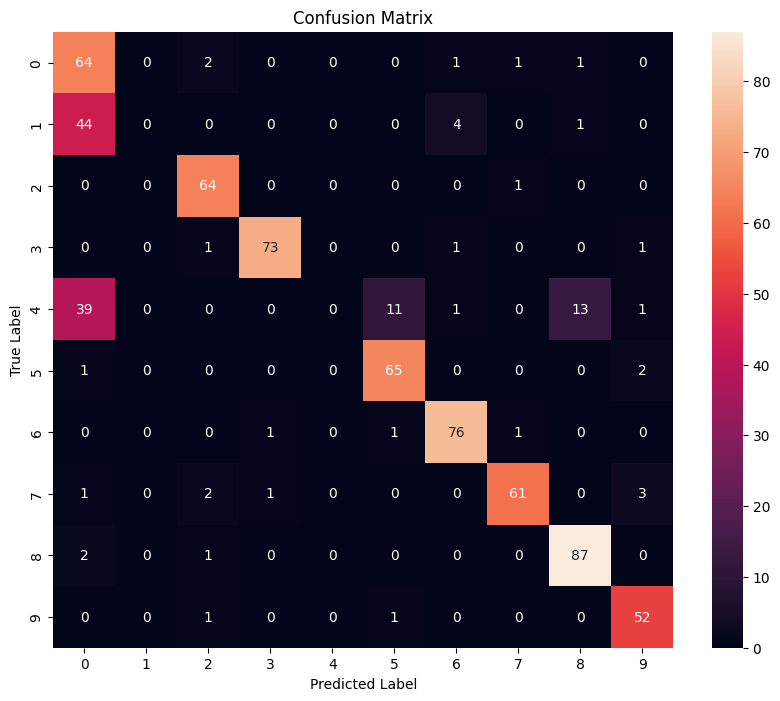

F1 Score (weighted): 0.7373
              precision    recall  f1-score   support

           0       0.42      0.93      0.58        69
           1       0.00      0.00      0.00        49
           2       0.90      0.98      0.94        65
           3       0.97      0.96      0.97        76
           4       0.00      0.00      0.00        65
           5       0.83      0.96      0.89        68
           6       0.92      0.96      0.94        79
           7       0.95      0.90      0.92        68
           8       0.85      0.97      0.91        90
           9       0.88      0.96      0.92        54

    accuracy                           0.79       683
   macro avg       0.67      0.76      0.71       683
weighted avg       0.70      0.79      0.74       683



c:\Users\sitth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sitth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sitth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [95]:
### START CODE HERE ###
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns
model = CustomLeNet()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device) 
checkpoint_path = 'trained/lenet_epoch_100.pth'
model.load_state_dict(torch.load(checkpoint_path, map_location=device))  # Load weights to the correct device (เช่น cuda)
model.eval()

# Function ดึงค่า predictions และ labels ที่ถูกต้อง
def get_predictions(model, test_loader, device='cpu'):
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    return np.array(all_labels), np.array(all_preds)

# Get the true labels and predictions
true_labels, predicted_labels = get_predictions(model, test_loader, device)

# หาค่า confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot กราฟ confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, xticklabels=list(range(10)), yticklabels=list(range(10)))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# หาค่า F1 score สำหรับตอบคำถามท้าย Lab
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score (weighted): {f1:.4f}")

# Optionally, print a detailed classification report
print(classification_report(true_labels, predicted_labels))
### END CODE HERE ###

Visualize the feature map of ***ALL*** layers of the Convolution Feature Extractor part. Then, save it as an image

In [90]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

class FeatureExtractor(nn.Module):
    def __init__(self, model, target_layers):
        super(FeatureExtractor, self).__init__()
        self.model = copy.deepcopy(model)
        self.target_layers = target_layers
        self.features = []

        for layer_name, layer in self.model.named_modules():
            if layer_name in target_layers:
                layer.register_forward_hook(self.save_feature(layer_name))

    def save_feature(self, layer_name):
        def hook(module, input, output):
            self.features.append(output)
        return hook

    def forward(self, x):
        self.features = []
        self.model(x)
        return self.features

def visualize_feature_map(feature_maps, base_filename):
    for layer_idx, feature in enumerate(feature_maps):
        # Convert feature map to numpy array
        feature_np = feature.cpu().detach().numpy()
        # Get the number of channels
        num_channels = feature_np.shape[1]
        # Determine grid size
        grid_size = int(np.ceil(np.sqrt(num_channels)))
        fig, axs = plt.subplots(grid_size, grid_size, figsize=(20, 20))
        fig.suptitle(f'Feature Maps for Layer {layer_idx + 1}', fontsize=16)
        axs = axs.flatten() if isinstance(axs, np.ndarray) else [axs]
        for i in range(num_channels):
            if i < len(axs):
                axs[i].imshow(feature_np[0, i], cmap='gray')
                axs[i].axis('off')
                axs[i].set_title(f'Channel {i + 1}')
        # Remove unused subplots
        for i in range(num_channels, len(axs)):
            fig.delaxes(axs[i])
        plt.tight_layout()
        plt.savefig(f"{base_filename}_layer_{layer_idx + 1}.png")
        plt.close()
    
    print(f"Feature maps saved with base filename: {base_filename}")

# Load your model and weights
checkpoint_path = 'trained/lenet_epoch_100.pth'  # Update this to your actual path
model = CustomLeNet()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.load_state_dict(torch.load(checkpoint_path, map_location=device))
model.eval()
model.to(device)

# ระบึ layer ที่ต้องการส่อง
target_layers = ["conv1", "conv2", "conv3"]
extractor = FeatureExtractor(model, target_layers)

#ส่องทุกเลข ครั้งแรก ที่เข้าแต่ละ layer
for digit in range(10):
    # Find the first image of the current digit
    for images, labels in test_loader:
        for i, label in enumerate(labels):
            if label.item() == digit:
                # Prepare the image
                image = images[i].unsqueeze(0).to(device)  # Get the specific image
                feature_maps = extractor(image)
                
                # Visualize and save feature maps
                visualize_feature_map(feature_maps, base_filename=f"feature_maps/digit_{digit}_feature_maps")
                
                break  # Move to the next digit after processing the first image
        else:
            continue  # Continue the outer loop if inner loop didn't break
        break  # Break the outer loop if we processed the digit

print("Feature map extraction and visualization completed for all digits.")


C:\Users\sitth\AppData\Local\Temp\ipykernel_24776\3677205173.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_path, map_locat

Feature maps saved with base filename: feature_maps/digit_0_feature_maps
Feature maps saved with base filename: feature_maps/digit_1_feature_maps
Feature maps saved with base filename: feature_maps/digit_2_feature_maps
Feature maps saved with base filename: feature_maps/digit_3_feature_maps
Feature maps saved with base filename: feature_maps/digit_4_feature_maps
Feature maps saved with base filename: feature_maps/digit_5_feature_maps
Feature maps saved with base filename: feature_maps/digit_6_feature_maps
Feature maps saved with base filename: feature_maps/digit_7_feature_maps
Feature maps saved with base filename: feature_maps/digit_8_feature_maps
Feature maps saved with base filename: feature_maps/digit_9_feature_maps
Feature map extraction and visualization completed for all digits.


---
# Questions
1. Identify the top 3 classes with the worst F1 scores and perform an in-depth analysis of the model’s behavior on misclassified images. Analyze the feature map of an incorrectly predicted image from each class and compare it with the feature map of a correctly predicted image from the same class.
2. Does a deeper model always lead to better performance? Discuss this by considering factors such as overfitting, training time, data complexity, and model capacity. Provide examples from relevant experiments to support your argument.


# ตอบคำถามท้าย LAB 7.2
1. Identify the top 3 classes with the worst F1 scores and perform an in-depth analysis of the model’s behavior on misclassified images. Analyze the feature map of an incorrectly predicted image from each class and compare it with the feature map of a correctly predicted image from the same class.

    ans: F1 แย่สุดเรียงตามลำดับ เลข 1, 4, 0
    วิเคราะห์ผลจาก Featuremap: โมเดลตีความเลข 1 และ 4 เป็นเลข 0 เนื่องจากเป็นวงๆ คล้ายกัน ใน Dataset เดิม เลข 4 ตัวเล็กบางตัวเขียนคล้ายเลข 0 (คล้ายวงปิด)<br>
    ส่วนเลขอื่นๆ ที่ทำนายไม่ผิด เพราะมีวิธีการเขียนที่แตกต่างชัดเจน หากเป็นเลขอาราบิก อาจสามารถทำนายได้ง่ายกว่านี้ เนื่องจากมีความแตกต่างกันอยู่มาก

---
2. Does a deeper model always lead to better performance? Discuss this by considering factors such as overfitting, training time, data complexity, and model capacity. Provide examples from relevant experiments to support your argument.

    ans: หาก Deeper model เกินไป อาจเกิด <br>
    1.Overfitting: โมเดลจำข้อมูลที่เทรนไปเป็นคำตอบของทุกอย่าง โดยไม่ยืดหยุ่นต่อรูปแบบใหม่ๆ บางทีอาจไป detect noise แทนภาพที่ต้องการ<br>
    2.Training time: ทำให้ใช้เวลานานมากๆ ในการ train<br>
    3.Data Complexity: แต่ก็จะทำให้เก็บรายละเอียดได้ดียิ่งขึ้น<br>
    4.Model Capacity: คือความสามารถในการเรียนรู้ pattern ที่ซ่อนอยู่ใน Training data ที่เราป้อนเข้าไปให้ ถ้า Model ของเรามี Capacity สูง Model ของเราก็จะสามารถเรียนรู้ pattern ของข้อมูลที่ซับซ้อนมากยิ่งขึ้นได้ แต่ก็ระวังการ Overfitting
